In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Figure settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print("Matplotlib backend:", plt.get_backend())

Libraries imported successfully!
Matplotlib backend: module://matplotlib_inline.backend_inline


## Load Processed Data

In [2]:
# Load the preprocessed datasets
print("Loading processed datasets...")

df_daily = pd.read_pickle('../outputs/df_clean_daily.pkl')
df_monthly_district = pd.read_pickle('../outputs/df_monthly_district.pkl')
df_monthly_state = pd.read_pickle('../outputs/df_monthly_state.pkl')

print(f"✓ Daily data: {len(df_daily):,} records")
print(f"✓ Monthly district data: {len(df_monthly_district):,} records")
print(f"✓ Monthly state data: {len(df_monthly_state):,} records")

# Quick preview
print("\nSample of daily data:")
df_daily.head()

Loading processed datasets...


✓ Daily data: 2,375,882 records
✓ Monthly district data: 7,062 records
✓ Monthly state data: 385 records

Sample of daily data:


,date,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,year_month,day,quarter,pincode_valid
0,2025-12-26,Jaipur,Near Meera Hospital,302016,0,1,2025,12,2025-12,26,4,True
1,2025-12-22,Jaipur,Near Meera Hospital,302016,0,1,2025,12,2025-12,22,4,True
2,2025-12-13,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,2025,12,2025-12,13,4,True
3,2025-12-22,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,2025,12,2025-12,22,4,True
4,2025-12-14,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,2025,12,2025-12,14,4,True


## 1. Distribution Analysis of Child Updates (demo_age_5_17)

Understanding the distribution of child demographic updates across the dataset.

### 1.1 Summary Statistics for Child Updates

In [3]:
# Summary statistics for child updates
print("="*70)
print("CHILD UPDATES (Age 5-17) - SUMMARY STATISTICS")
print("="*70)

child_stats = df_daily['demo_age_5_17'].describe()
print(child_stats)

# Additional statistics
print(f"\nAdditional Metrics:")
print(f"Total child updates: {df_daily['demo_age_5_17'].sum():,}")
print(f"Median: {df_daily['demo_age_5_17'].median():.2f}")
print(f"Mode: {df_daily['demo_age_5_17'].mode()[0] if len(df_daily['demo_age_5_17'].mode()) > 0 else 'N/A'}")
print(f"Variance: {df_daily['demo_age_5_17'].var():.2f}")
print(f"Standard Deviation: {df_daily['demo_age_5_17'].std():.2f}")
print(f"Coefficient of Variation: {(df_daily['demo_age_5_17'].std() / df_daily['demo_age_5_17'].mean() * 100):.2f}%")
print(f"Skewness: {df_daily['demo_age_5_17'].skew():.2f}")
print(f"Kurtosis: {df_daily['demo_age_5_17'].kurtosis():.2f}")

# Percentiles
print(f"\nPercentile Distribution:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df_daily['demo_age_5_17'], p)
    print(f"  {p}th percentile: {value:.2f}")

CHILD UPDATES (Age 5-17) - SUMMARY STATISTICS
count   2375882.00
mean          1.90
std          12.99
min           0.00
25%           0.00
50%           0.00
75%           2.00
max        2690.00
Name: demo_age_5_17, dtype: float64

Additional Metrics:
Total child updates: 4,525,272


Median: 0.00


Mode: 0
Variance: 168.82
Standard Deviation: 12.99
Coefficient of Variation: 682.18%
Skewness: 45.78
Kurtosis: 4196.37

Percentile Distribution:
  10th percentile: 0.00


  25th percentile: 0.00


  50th percentile: 0.00
  75th percentile: 2.00
  90th percentile: 4.00
  95th percentile: 6.00
  99th percentile: 17.00


### 1.2 Histogram - Child Updates Distribution

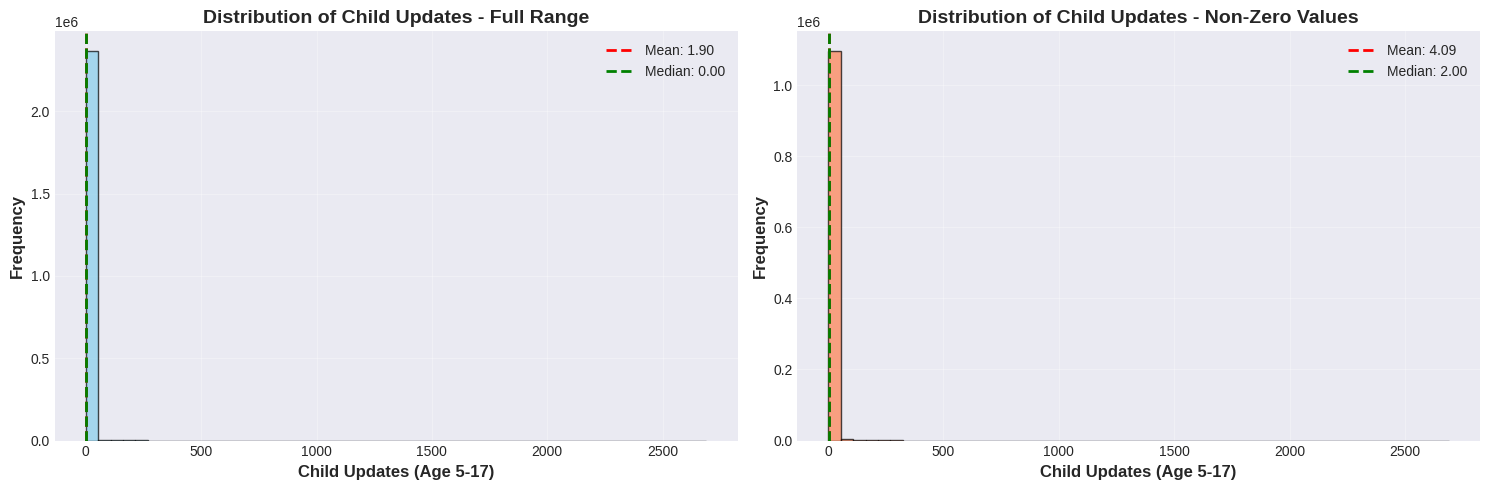

Zero values: 1,270,751 (53.49%)
Non-zero values: 1,105,131 (46.51%)


In [4]:
# Create histogram for child updates
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Full distribution
axes[0].hist(df_daily['demo_age_5_17'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_daily['demo_age_5_17'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_daily["demo_age_5_17"].mean():.2f}')
axes[0].axvline(df_daily['demo_age_5_17'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_daily["demo_age_5_17"].median():.2f}')
axes[0].set_xlabel('Child Updates (Age 5-17)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Child Updates - Full Range', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed distribution (excluding zeros for better visualization)
child_nonzero = df_daily[df_daily['demo_age_5_17'] > 0]['demo_age_5_17']
axes[1].hist(child_nonzero, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(child_nonzero.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {child_nonzero.mean():.2f}')
axes[1].axvline(child_nonzero.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {child_nonzero.median():.2f}')
axes[1].set_xlabel('Child Updates (Age 5-17)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Child Updates - Non-Zero Values', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/01_child_updates_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Zero values: {(df_daily['demo_age_5_17'] == 0).sum():,} ({(df_daily['demo_age_5_17'] == 0).sum()/len(df_daily)*100:.2f}%)")
print(f"Non-zero values: {len(child_nonzero):,} ({len(child_nonzero)/len(df_daily)*100:.2f}%)")

### 1.3 Box Plot - Child Updates

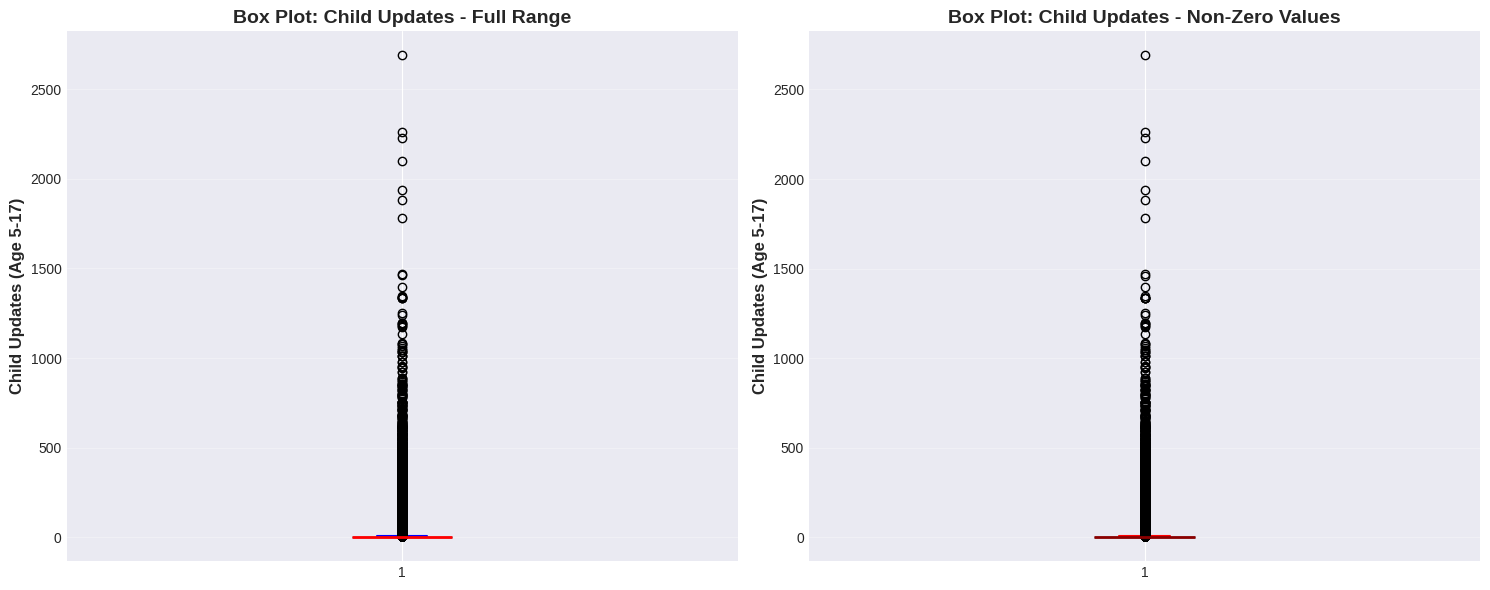


Outlier Analysis (IQR Method):
Q1 (25th percentile): 0.00
Q3 (75th percentile): 2.00
IQR: 2.00
Lower bound: -3.00
Upper bound: 5.00
Number of outliers: 129,159 (5.44%)


In [5]:
# Create box plot for child updates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot - full range
axes[0].boxplot(df_daily['demo_age_5_17'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue', linewidth=1.5),
                capprops=dict(color='blue', linewidth=1.5))
axes[0].set_ylabel('Child Updates (Age 5-17)', fontsize=12, fontweight='bold')
axes[0].set_title('Box Plot: Child Updates - Full Range', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot - non-zero values
axes[1].boxplot(child_nonzero, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='darkred', linewidth=2),
                whiskerprops=dict(color='red', linewidth=1.5),
                capprops=dict(color='red', linewidth=1.5))
axes[1].set_ylabel('Child Updates (Age 5-17)', fontsize=12, fontweight='bold')
axes[1].set_title('Box Plot: Child Updates - Non-Zero Values', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/02_child_updates_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify outliers using IQR method
Q1 = df_daily['demo_age_5_17'].quantile(0.25)
Q3 = df_daily['demo_age_5_17'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_daily[(df_daily['demo_age_5_17'] < Q1 - 1.5*IQR) | (df_daily['demo_age_5_17'] > Q3 + 1.5*IQR)]

print(f"\nOutlier Analysis (IQR Method):")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {Q1 - 1.5*IQR:.2f}")
print(f"Upper bound: {Q3 + 1.5*IQR:.2f}")
print(f"Number of outliers: {len(outliers):,} ({len(outliers)/len(df_daily)*100:.2f}%)")

## 2. Distribution Analysis of Adult Updates (demo_age_17_)

Understanding the distribution of adult demographic updates across the dataset.

### 2.1 Summary Statistics for Adult Updates

In [6]:
# Summary statistics for adult updates
print("="*70)
print("ADULT UPDATES (Age 17+) - SUMMARY STATISTICS")
print("="*70)

adult_stats = df_daily['demo_age_17_'].describe()
print(adult_stats)

# Additional statistics
print(f"\nAdditional Metrics:")
print(f"Total adult updates: {df_daily['demo_age_17_'].sum():,}")
print(f"Median: {df_daily['demo_age_17_'].median():.2f}")
print(f"Mode: {df_daily['demo_age_17_'].mode()[0] if len(df_daily['demo_age_17_'].mode()) > 0 else 'N/A'}")
print(f"Variance: {df_daily['demo_age_17_'].var():.2f}")
print(f"Standard Deviation: {df_daily['demo_age_17_'].std():.2f}")
print(f"Coefficient of Variation: {(df_daily['demo_age_17_'].std() / df_daily['demo_age_17_'].mean() * 100):.2f}%")
print(f"Skewness: {df_daily['demo_age_17_'].skew():.2f}")
print(f"Kurtosis: {df_daily['demo_age_17_'].kurtosis():.2f}")

# Percentiles
print(f"\nPercentile Distribution:")
for p in percentiles:
    value = np.percentile(df_daily['demo_age_17_'], p)
    print(f"  {p}th percentile: {value:.2f}")

ADULT UPDATES (Age 17+) - SUMMARY STATISTICS
count   2375882.00
mean         19.11
std         110.20
min           0.00
25%           2.00
50%           5.00
75%          14.00
max       16166.00
Name: demo_age_17_, dtype: float64

Additional Metrics:
Total adult updates: 45,407,009
Median: 5.00
Mode: 1
Variance: 12144.60


Standard Deviation: 110.20


Coefficient of Variation: 576.63%
Skewness: 38.96
Kurtosis: 2769.66

Percentile Distribution:
  10th percentile: 1.00
  25th percentile: 2.00
  50th percentile: 5.00


  75th percentile: 14.00
  90th percentile: 34.00
  95th percentile: 56.00
  99th percentile: 182.00


### 2.2 Histogram - Adult Updates Distribution

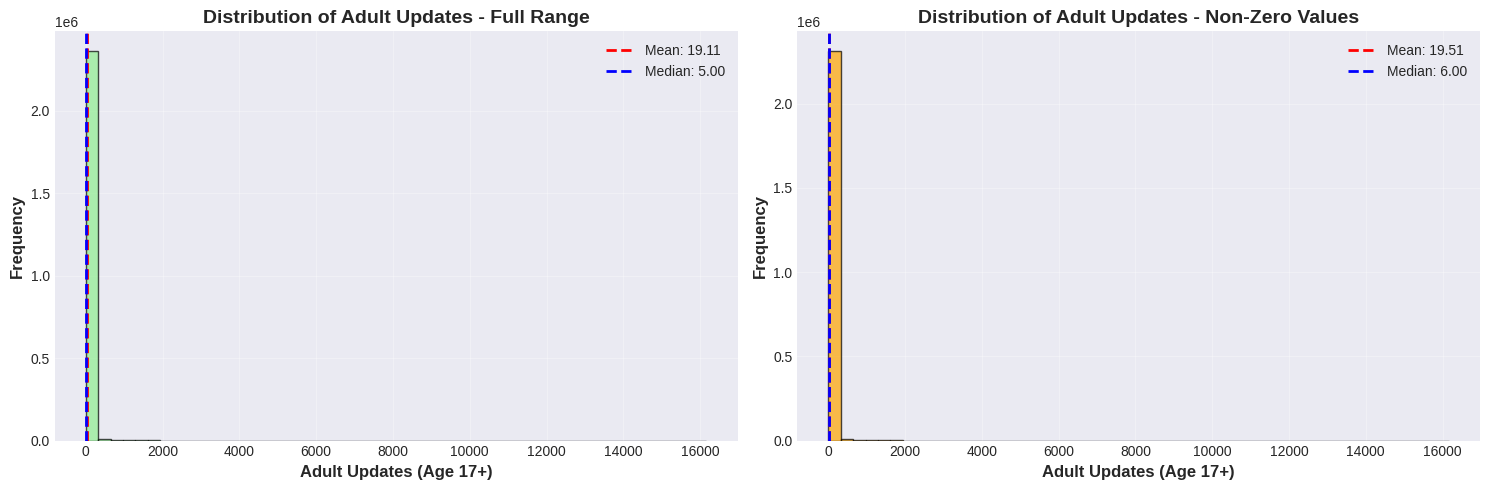

Zero values: 48,835 (2.06%)
Non-zero values: 2,327,047 (97.94%)


In [7]:
# Create histogram for adult updates
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Full distribution
axes[0].hist(df_daily['demo_age_17_'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(df_daily['demo_age_17_'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_daily["demo_age_17_"].mean():.2f}')
axes[0].axvline(df_daily['demo_age_17_'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df_daily["demo_age_17_"].median():.2f}')
axes[0].set_xlabel('Adult Updates (Age 17+)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Adult Updates - Full Range', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed distribution (excluding zeros)
adult_nonzero = df_daily[df_daily['demo_age_17_'] > 0]['demo_age_17_']
axes[1].hist(adult_nonzero, bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(adult_nonzero.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {adult_nonzero.mean():.2f}')
axes[1].axvline(adult_nonzero.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {adult_nonzero.median():.2f}')
axes[1].set_xlabel('Adult Updates (Age 17+)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Adult Updates - Non-Zero Values', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/03_adult_updates_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Zero values: {(df_daily['demo_age_17_'] == 0).sum():,} ({(df_daily['demo_age_17_'] == 0).sum()/len(df_daily)*100:.2f}%)")
print(f"Non-zero values: {len(adult_nonzero):,} ({len(adult_nonzero)/len(df_daily)*100:.2f}%)")

### 2.3 Box Plot - Adult Updates

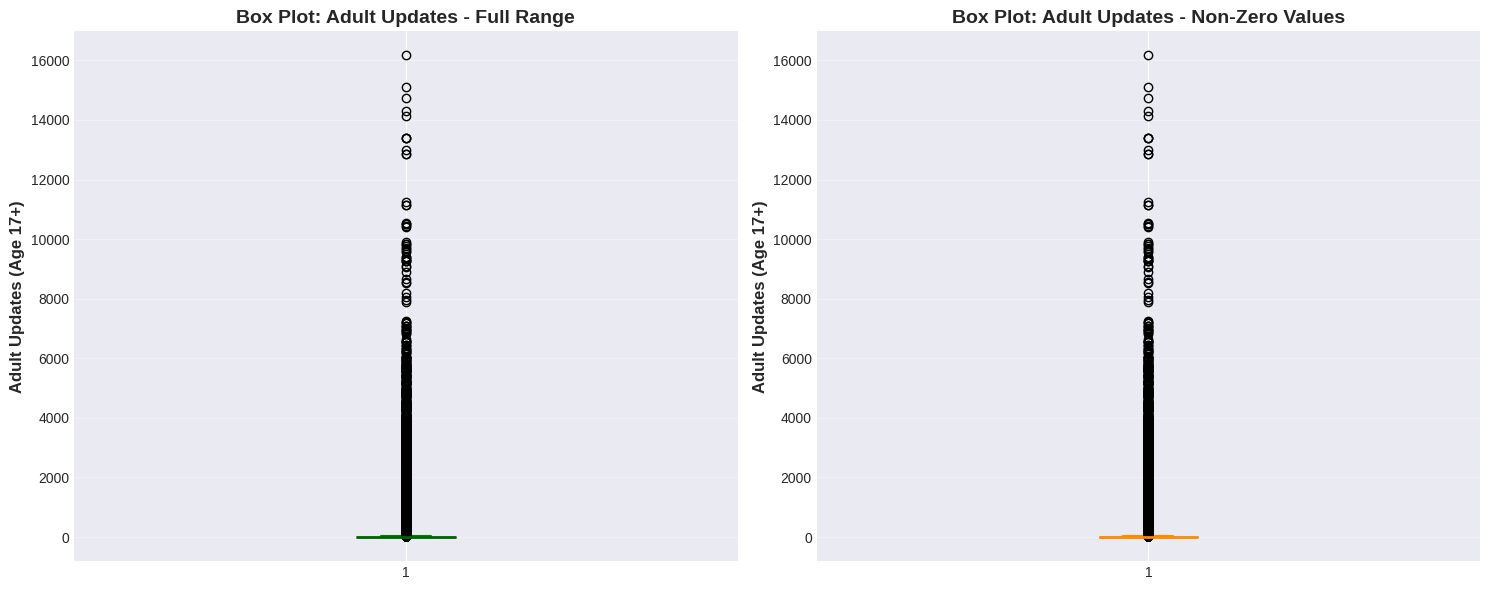


Outlier Analysis (IQR Method):
Q1 (25th percentile): 2.00
Q3 (75th percentile): 14.00
IQR: 12.00
Lower bound: -16.00
Upper bound: 32.00
Number of outliers: 250,505 (10.54%)


In [8]:
# Create box plot for adult updates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot - full range
axes[0].boxplot(df_daily['demo_age_17_'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7),
                medianprops=dict(color='darkgreen', linewidth=2),
                whiskerprops=dict(color='green', linewidth=1.5),
                capprops=dict(color='green', linewidth=1.5))
axes[0].set_ylabel('Adult Updates (Age 17+)', fontsize=12, fontweight='bold')
axes[0].set_title('Box Plot: Adult Updates - Full Range', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot - non-zero values
axes[1].boxplot(adult_nonzero, vert=True, patch_artist=True,
                boxprops=dict(facecolor='orange', alpha=0.7),
                medianprops=dict(color='darkorange', linewidth=2),
                whiskerprops=dict(color='darkorange', linewidth=1.5),
                capprops=dict(color='darkorange', linewidth=1.5))
axes[1].set_ylabel('Adult Updates (Age 17+)', fontsize=12, fontweight='bold')
axes[1].set_title('Box Plot: Adult Updates - Non-Zero Values', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/04_adult_updates_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Outlier analysis
Q1_adult = df_daily['demo_age_17_'].quantile(0.25)
Q3_adult = df_daily['demo_age_17_'].quantile(0.75)
IQR_adult = Q3_adult - Q1_adult
outliers_adult = df_daily[(df_daily['demo_age_17_'] < Q1_adult - 1.5*IQR_adult) | (df_daily['demo_age_17_'] > Q3_adult + 1.5*IQR_adult)]

print(f"\nOutlier Analysis (IQR Method):")
print(f"Q1 (25th percentile): {Q1_adult:.2f}")
print(f"Q3 (75th percentile): {Q3_adult:.2f}")
print(f"IQR: {IQR_adult:.2f}")
print(f"Lower bound: {Q1_adult - 1.5*IQR_adult:.2f}")
print(f"Upper bound: {Q3_adult + 1.5*IQR_adult:.2f}")
print(f"Number of outliers: {len(outliers_adult):,} ({len(outliers_adult)/len(df_daily)*100:.2f}%)")

### 2.4 Comparative Distribution: Child vs Adult

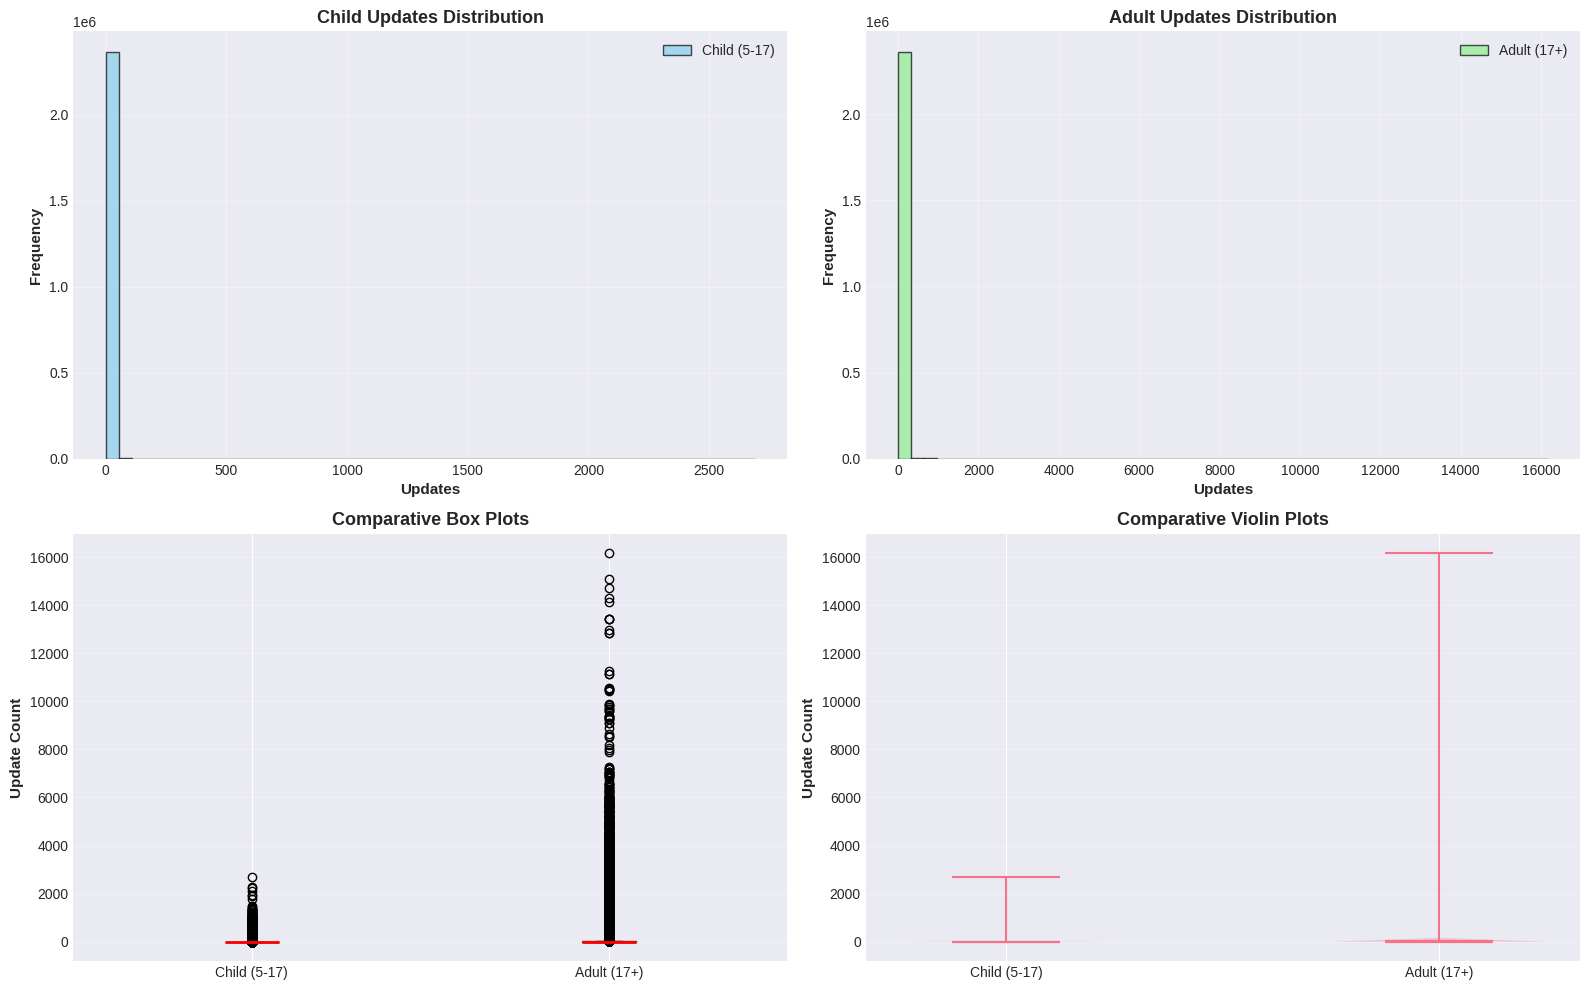


STATISTICAL COMPARISON: CHILD vs ADULT UPDATES
Metric                    Child (5-17)         Adult (17+)         
----------------------------------------------------------------------
Mean                      1.90                 19.11               
Median                    0.00                 5.00                
Std Dev                   12.99                110.20              
Min                       0.00                 0.00                
Max                       2690.00              16166.00            
Total                     4,525,272            45,407,009          


In [9]:
# Side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histograms
axes[0, 0].hist(df_daily['demo_age_5_17'], bins=50, color='skyblue', alpha=0.7, label='Child (5-17)', edgecolor='black')
axes[0, 0].set_xlabel('Updates', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Child Updates Distribution', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df_daily['demo_age_17_'], bins=50, color='lightgreen', alpha=0.7, label='Adult (17+)', edgecolor='black')
axes[0, 1].set_xlabel('Updates', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Adult Updates Distribution', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Box plots
box_data = [df_daily['demo_age_5_17'], df_daily['demo_age_17_']]
bp = axes[1, 0].boxplot(box_data, labels=['Child (5-17)', 'Adult (17+)'], patch_artist=True,
                         boxprops=dict(alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
bp['boxes'][0].set_facecolor('skyblue')
bp['boxes'][1].set_facecolor('lightgreen')
axes[1, 0].set_ylabel('Update Count', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Comparative Box Plots', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Violin plots for better distribution view
data_violin = pd.DataFrame({
    'Child': df_daily['demo_age_5_17'],
    'Adult': df_daily['demo_age_17_']
})
axes[1, 1].violinplot([data_violin['Child'], data_violin['Adult']], 
                       positions=[1, 2], showmeans=True, showmedians=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Child (5-17)', 'Adult (17+)'])
axes[1, 1].set_ylabel('Update Count', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Comparative Violin Plots', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/05_child_vs_adult_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical comparison
print("\nSTATISTICAL COMPARISON: CHILD vs ADULT UPDATES")
print("="*70)
print(f"{'Metric':<25} {'Child (5-17)':<20} {'Adult (17+)':<20}")
print("-"*70)
print(f"{'Mean':<25} {df_daily['demo_age_5_17'].mean():<20.2f} {df_daily['demo_age_17_'].mean():<20.2f}")
print(f"{'Median':<25} {df_daily['demo_age_5_17'].median():<20.2f} {df_daily['demo_age_17_'].median():<20.2f}")
print(f"{'Std Dev':<25} {df_daily['demo_age_5_17'].std():<20.2f} {df_daily['demo_age_17_'].std():<20.2f}")
print(f"{'Min':<25} {df_daily['demo_age_5_17'].min():<20.2f} {df_daily['demo_age_17_'].min():<20.2f}")
print(f"{'Max':<25} {df_daily['demo_age_5_17'].max():<20.2f} {df_daily['demo_age_17_'].max():<20.2f}")
print(f"{'Total':<25} {df_daily['demo_age_5_17'].sum():<20,.0f} {df_daily['demo_age_17_'].sum():<20,.0f}")

## 3. Monthly Update Volume Trends

Analyzing temporal patterns and trends in update volumes.

### 3.1 Aggregate Monthly Trends

In [10]:
# Aggregate by month for overall trends
monthly_totals = df_monthly_district.groupby('year_month').agg({
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum',
    'total_updates': 'sum',
    'district': 'count'
}).reset_index()
monthly_totals.rename(columns={'district': 'record_count'}, inplace=True)

# Convert period to string for plotting
monthly_totals['month_str'] = monthly_totals['year_month'].astype(str)

print("Monthly Aggregated Data:")
print(monthly_totals)

Monthly Aggregated Data:
  year_month  demo_age_5_17  demo_age_17_  total_updates  record_count  \
0    2025-03         844596       8912978        9757574           813   
1    2025-04         193026       1310670        1503696           293   
2    2025-05         196122       1306969        1503091           300   
3    2025-06         172541       1311162        1483703           285   
4    2025-07         244966       1643453        1888419           340   
5    2025-09         785580       6655825        7441405          1000   
6    2025-10         452556       4342581        4795137          1003   
7    2025-11         737658       9730801       10468459          1023   
8    2025-12         838037       9669595       10507632          1042   
9    2026-01          60190        522975         583165           963   

  month_str  
0   2025-03  
1   2025-04  
2   2025-05  
3   2025-06  
4   2025-07  
5   2025-09  
6   2025-10  
7   2025-11  
8   2025-12  
9   2026-01  


### 3.2 Time Series Line Chart - Overall Trends

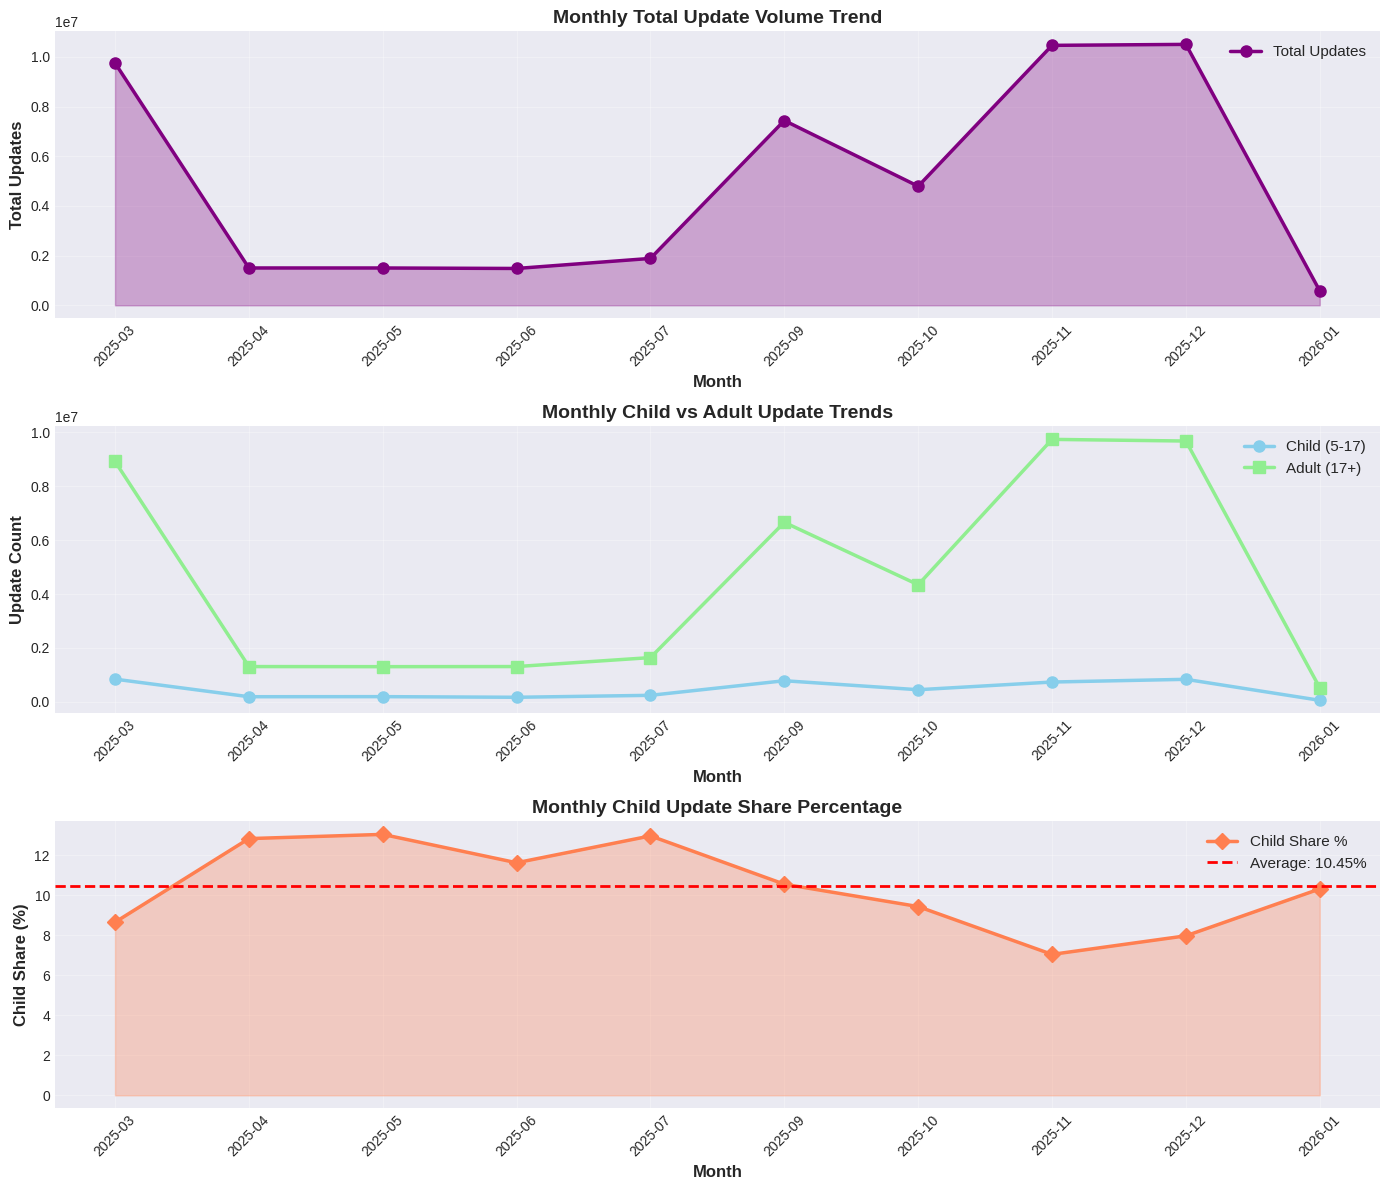

In [11]:
# Create comprehensive time series visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Total updates over time
axes[0].plot(monthly_totals['month_str'], monthly_totals['total_updates'], 
             marker='o', linewidth=2.5, markersize=8, color='purple', label='Total Updates')
axes[0].fill_between(range(len(monthly_totals)), monthly_totals['total_updates'], alpha=0.3, color='purple')
axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Updates', fontsize=12, fontweight='bold')
axes[0].set_title('Monthly Total Update Volume Trend', fontsize=14, fontweight='bold')
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Child vs Adult updates over time
axes[1].plot(monthly_totals['month_str'], monthly_totals['demo_age_5_17'], 
             marker='o', linewidth=2.5, markersize=8, color='skyblue', label='Child (5-17)')
axes[1].plot(monthly_totals['month_str'], monthly_totals['demo_age_17_'], 
             marker='s', linewidth=2.5, markersize=8, color='lightgreen', label='Adult (17+)')
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Update Count', fontsize=12, fontweight='bold')
axes[1].set_title('Monthly Child vs Adult Update Trends', fontsize=14, fontweight='bold')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Child update share percentage over time
monthly_totals['child_share_pct'] = (monthly_totals['demo_age_5_17'] / monthly_totals['total_updates'] * 100)
axes[2].plot(monthly_totals['month_str'], monthly_totals['child_share_pct'], 
             marker='D', linewidth=2.5, markersize=8, color='coral', label='Child Share %')
axes[2].axhline(y=monthly_totals['child_share_pct'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Average: {monthly_totals["child_share_pct"].mean():.2f}%')
axes[2].fill_between(range(len(monthly_totals)), monthly_totals['child_share_pct'], alpha=0.3, color='coral')
axes[2].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Child Share (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Monthly Child Update Share Percentage', fontsize=14, fontweight='bold')
axes[2].legend(loc='best', fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../outputs/06_monthly_trends_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.3 Calculate Growth Rates


MONTH-OVER-MONTH GROWTH RATES
  month_str  total_growth_rate  child_growth_rate  adult_growth_rate
0   2025-03                NaN                NaN                NaN
1   2025-04             -84.59             -77.15             -85.29
2   2025-05              -0.04               1.60              -0.28
3   2025-06              -1.29             -12.02               0.32
4   2025-07              27.28              41.98              25.34
5   2025-09             294.05             220.69             304.99
6   2025-10             -35.56             -42.39             -34.76
7   2025-11             118.31              63.00             124.08
8   2025-12               0.37              13.61              -0.63
9   2026-01             -94.45             -92.82             -94.59


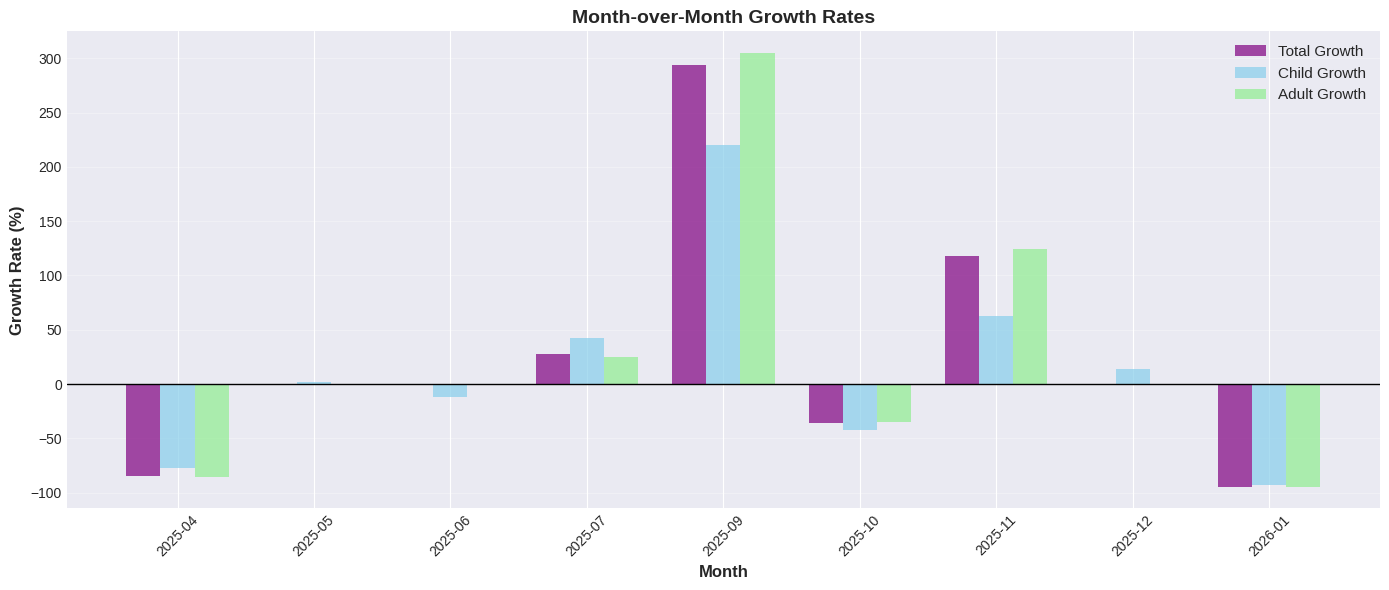


Growth Rate Statistics:
Average total growth rate: 24.90%
Average child growth rate: 12.94%
Average adult growth rate: 26.58%

Max growth month (total): 2025-09 (294.05%)
Min growth month (total): 2026-01 (-94.45%)


In [12]:
# Calculate month-over-month growth rates
monthly_totals['total_growth_rate'] = monthly_totals['total_updates'].pct_change() * 100
monthly_totals['child_growth_rate'] = monthly_totals['demo_age_5_17'].pct_change() * 100
monthly_totals['adult_growth_rate'] = monthly_totals['demo_age_17_'].pct_change() * 100

print("\nMONTH-OVER-MONTH GROWTH RATES")
print("="*70)
print(monthly_totals[['month_str', 'total_growth_rate', 'child_growth_rate', 'adult_growth_rate']])

# Visualize growth rates
fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(monthly_totals[1:]))  # Skip first month (no growth rate)
width = 0.25

ax.bar([i - width for i in x], monthly_totals['total_growth_rate'][1:], width, 
       label='Total Growth', color='purple', alpha=0.7)
ax.bar(x, monthly_totals['child_growth_rate'][1:], width, 
       label='Child Growth', color='skyblue', alpha=0.7)
ax.bar([i + width for i in x], monthly_totals['adult_growth_rate'][1:], width, 
       label='Adult Growth', color='lightgreen', alpha=0.7)

ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Month-over-Month Growth Rates', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(monthly_totals['month_str'][1:], rotation=45)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/07_monthly_growth_rates.png', dpi=300, bbox_inches='tight')
plt.show()

# Growth rate statistics
print("\nGrowth Rate Statistics:")
print(f"Average total growth rate: {monthly_totals['total_growth_rate'][1:].mean():.2f}%")
print(f"Average child growth rate: {monthly_totals['child_growth_rate'][1:].mean():.2f}%")
print(f"Average adult growth rate: {monthly_totals['adult_growth_rate'][1:].mean():.2f}%")
print(f"\nMax growth month (total): {monthly_totals.loc[monthly_totals['total_growth_rate'].idxmax(), 'month_str']} ({monthly_totals['total_growth_rate'].max():.2f}%)")
print(f"Min growth month (total): {monthly_totals.loc[monthly_totals['total_growth_rate'].idxmin(), 'month_str']} ({monthly_totals['total_growth_rate'].min():.2f}%)")

### 3.4 Identify Seasonal Patterns


Seasonal Pattern Analysis (By Month of Year):
  month_name  demo_age_5_17  demo_age_17_  total_updates
0        Jan          60190        522975         583165
1        Mar         844596       8912978        9757574
2        Apr         193026       1310670        1503696
3        May         196122       1306969        1503091
4        Jun         172541       1311162        1483703
5        Jul         244966       1643453        1888419
6        Sep         785580       6655825        7441405
7        Oct         452556       4342581        4795137
8        Nov         737658       9730801       10468459
9        Dec         838037       9669595       10507632


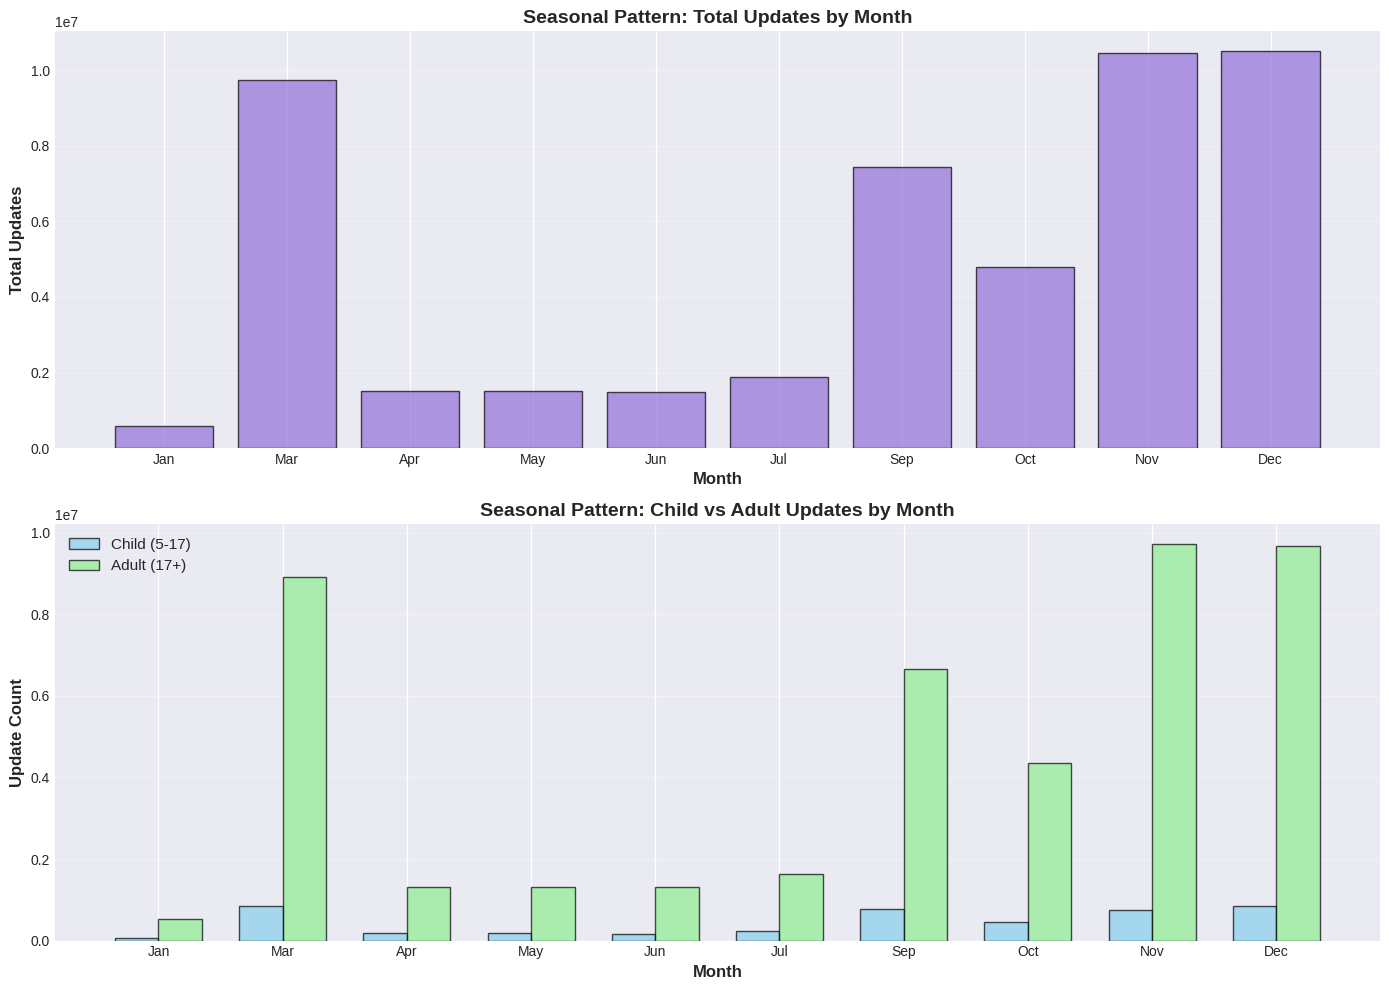


Peak update month: Dec (10,507,632 updates)
Lowest update month: Jan (583,165 updates)
Seasonal variation: 18.02x


In [13]:
# Analyze by month of year for seasonal patterns
# Extract month from date
df_daily_with_month = df_daily.copy()
df_daily_with_month['month_name'] = df_daily_with_month['date'].dt.strftime('%B')
df_daily_with_month['month_num'] = df_daily_with_month['date'].dt.month

# Aggregate by month of year
seasonal_pattern = df_daily_with_month.groupby('month_num').agg({
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum',
    'date': 'count'
}).reset_index()
seasonal_pattern['total_updates'] = seasonal_pattern['demo_age_5_17'] + seasonal_pattern['demo_age_17_']

# Add month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_pattern['month_name'] = seasonal_pattern['month_num'].apply(lambda x: month_names[x-1])

print("\nSeasonal Pattern Analysis (By Month of Year):")
print(seasonal_pattern[['month_name', 'demo_age_5_17', 'demo_age_17_', 'total_updates']])

# Visualize seasonal patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Total updates by month
axes[0].bar(seasonal_pattern['month_name'], seasonal_pattern['total_updates'], 
            color='mediumpurple', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Updates', fontsize=12, fontweight='bold')
axes[0].set_title('Seasonal Pattern: Total Updates by Month', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Child vs Adult by month
x_pos = np.arange(len(seasonal_pattern))
width = 0.35
axes[1].bar(x_pos - width/2, seasonal_pattern['demo_age_5_17'], width, 
            label='Child (5-17)', color='skyblue', alpha=0.7, edgecolor='black')
axes[1].bar(x_pos + width/2, seasonal_pattern['demo_age_17_'], width, 
            label='Adult (17+)', color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Update Count', fontsize=12, fontweight='bold')
axes[1].set_title('Seasonal Pattern: Child vs Adult Updates by Month', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(seasonal_pattern['month_name'])
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/08_seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify peak and low months
peak_month = seasonal_pattern.loc[seasonal_pattern['total_updates'].idxmax()]
low_month = seasonal_pattern.loc[seasonal_pattern['total_updates'].idxmin()]

print(f"\nPeak update month: {peak_month['month_name']} ({peak_month['total_updates']:,.0f} updates)")
print(f"Lowest update month: {low_month['month_name']} ({low_month['total_updates']:,.0f} updates)")
print(f"Seasonal variation: {(peak_month['total_updates'] / low_month['total_updates']):.2f}x")

## 4. Summary: Univariate Analysis Findings

Key insights from the univariate analysis.

In [14]:
print("="*80)
print("UNIVARIATE ANALYSIS - KEY FINDINGS SUMMARY")
print("="*80)

print("\n1. CHILD UPDATES (Age 5-17):")
print("   " + "-"*70)
print(f"   • Total updates: {df_daily['demo_age_5_17'].sum():,}")
print(f"   • Mean per record: {df_daily['demo_age_5_17'].mean():.2f}")
print(f"   • Median: {df_daily['demo_age_5_17'].median():.2f}")
print(f"   • Std deviation: {df_daily['demo_age_5_17'].std():.2f}")
print(f"   • Skewness: {df_daily['demo_age_5_17'].skew():.2f} (highly right-skewed)")
print(f"   • Zero values: {(df_daily['demo_age_5_17'] == 0).sum()/len(df_daily)*100:.1f}%")
print(f"   • Outliers: {len(outliers)/len(df_daily)*100:.1f}%")

print("\n2. ADULT UPDATES (Age 17+):")
print("   " + "-"*70)
print(f"   • Total updates: {df_daily['demo_age_17_'].sum():,}")
print(f"   • Mean per record: {df_daily['demo_age_17_'].mean():.2f}")
print(f"   • Median: {df_daily['demo_age_17_'].median():.2f}")
print(f"   • Std deviation: {df_daily['demo_age_17_'].std():.2f}")
print(f"   • Skewness: {df_daily['demo_age_17_'].skew():.2f} (highly right-skewed)")
print(f"   • Zero values: {(df_daily['demo_age_17_'] == 0).sum()/len(df_daily)*100:.1f}%")
print(f"   • Outliers: {len(outliers_adult)/len(df_daily)*100:.1f}%")

print("\n3. COMPARATIVE INSIGHTS:")
print("   " + "-"*70)
adult_child_ratio = df_daily['demo_age_17_'].sum() / df_daily['demo_age_5_17'].sum()
print(f"   • Adult-to-Child ratio: {adult_child_ratio:.2f}:1")
print(f"   • Child share of total: {(df_daily['demo_age_5_17'].sum() / (df_daily['demo_age_5_17'].sum() + df_daily['demo_age_17_'].sum()) * 100):.2f}%")
print(f"   • Adult share of total: {(df_daily['demo_age_17_'].sum() / (df_daily['demo_age_5_17'].sum() + df_daily['demo_age_17_'].sum()) * 100):.2f}%")
print(f"   • Adult updates are {adult_child_ratio:.1f}x more frequent than child updates")

print("\n4. TEMPORAL TRENDS:")
print("   " + "-"*70)
print(f"   • Time period analyzed: {len(monthly_totals)} months")
print(f"   • Average monthly total updates: {monthly_totals['total_updates'].mean():,.0f}")
print(f"   • Average MoM growth rate: {monthly_totals['total_growth_rate'][1:].mean():.2f}%")
print(f"   • Peak month: {peak_month['month_name']} ({peak_month['total_updates']:,.0f} updates)")
print(f"   • Low month: {low_month['month_name']} ({low_month['total_updates']:,.0f} updates)")
print(f"   • Seasonal variation: {(peak_month['total_updates'] / low_month['total_updates']):.2f}x")

print("\n5. DISTRIBUTION CHARACTERISTICS:")
print("   " + "-"*70)
print("   • Both child and adult updates show highly right-skewed distributions")
print("   • Majority of records have low update counts (near zero)")
print("   • Presence of significant outliers indicating occasional high-volume updates")
print("   • Non-normal distributions suggest need for robust statistical methods")

print("\n6. KEY PATTERNS IDENTIFIED:")
print("   " + "-"*70)
if monthly_totals['total_growth_rate'][1:].mean() > 0:
    print("   • Overall growth trend: POSITIVE (increasing update volumes)")
else:
    print("   • Overall growth trend: NEGATIVE (decreasing update volumes)")
    
if monthly_totals['child_share_pct'].std() < 1:
    print("   • Child share stability: HIGH (consistent proportion)")
else:
    print("   • Child share stability: VARIABLE (fluctuating proportion)")
    
print("   • Adult updates dominate the dataset (>90% of all updates)")
print("   • Temporal patterns exist but require deeper analysis")

print("\n" + "="*80)
print("✅ UNIVARIATE ANALYSIS COMPLETE")
print("Next step: Bivariate Analysis (relationships and correlations)")
print("="*80)

UNIVARIATE ANALYSIS - KEY FINDINGS SUMMARY

1. CHILD UPDATES (Age 5-17):
   ----------------------------------------------------------------------
   • Total updates: 4,525,272
   • Mean per record: 1.90
   • Median: 0.00
   • Std deviation: 12.99
   • Skewness: 45.78 (highly right-skewed)
   • Zero values: 53.5%
   • Outliers: 5.4%

2. ADULT UPDATES (Age 17+):
   ----------------------------------------------------------------------
   • Total updates: 45,407,009
   • Mean per record: 19.11


   • Median: 5.00
   • Std deviation: 110.20
   • Skewness: 38.96 (highly right-skewed)
   • Zero values: 2.1%
   • Outliers: 10.5%

3. COMPARATIVE INSIGHTS:
   ----------------------------------------------------------------------
   • Adult-to-Child ratio: 10.03:1
   • Child share of total: 9.06%
   • Adult share of total: 90.94%
   • Adult updates are 10.0x more frequent than child updates

4. TEMPORAL TRENDS:
   ----------------------------------------------------------------------
   • Time period analyzed: 10 months
   • Average monthly total updates: 4,993,228
   • Average MoM growth rate: 24.90%
   • Peak month: Dec (10,507,632 updates)
   • Low month: Jan (583,165 updates)
   • Seasonal variation: 18.02x

5. DISTRIBUTION CHARACTERISTICS:
   ----------------------------------------------------------------------
   • Both child and adult updates show highly right-skewed distributions
   • Majority of records have low update counts (near zero)
   • Presence of significant outlier

## 5. Save Summary Statistics

In [15]:
# Create comprehensive summary dataframe
summary_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3', 
               'Skewness', 'Kurtosis', 'Total', 'Zero %'],
    'Child_Updates_5_17': [
        len(df_daily),
        df_daily['demo_age_5_17'].mean(),
        df_daily['demo_age_5_17'].median(),
        df_daily['demo_age_5_17'].std(),
        df_daily['demo_age_5_17'].min(),
        df_daily['demo_age_5_17'].max(),
        df_daily['demo_age_5_17'].quantile(0.25),
        df_daily['demo_age_5_17'].quantile(0.75),
        df_daily['demo_age_5_17'].skew(),
        df_daily['demo_age_5_17'].kurtosis(),
        df_daily['demo_age_5_17'].sum(),
        (df_daily['demo_age_5_17'] == 0).sum() / len(df_daily) * 100
    ],
    'Adult_Updates_17_Plus': [
        len(df_daily),
        df_daily['demo_age_17_'].mean(),
        df_daily['demo_age_17_'].median(),
        df_daily['demo_age_17_'].std(),
        df_daily['demo_age_17_'].min(),
        df_daily['demo_age_17_'].max(),
        df_daily['demo_age_17_'].quantile(0.25),
        df_daily['demo_age_17_'].quantile(0.75),
        df_daily['demo_age_17_'].skew(),
        df_daily['demo_age_17_'].kurtosis(),
        df_daily['demo_age_17_'].sum(),
        (df_daily['demo_age_17_'] == 0).sum() / len(df_daily) * 100
    ]
})

# Save to CSV
summary_stats.to_csv('../outputs/univariate_summary_statistics.csv', index=False)
print("✓ Summary statistics saved to: univariate_summary_statistics.csv")

# Save monthly trends
monthly_totals.to_csv('../outputs/monthly_trends_data.csv', index=False)
print("✓ Monthly trends saved to: monthly_trends_data.csv")

print("\n✅ All univariate analysis outputs saved successfully!")

✓ Summary statistics saved to: univariate_summary_statistics.csv
✓ Monthly trends saved to: monthly_trends_data.csv

✅ All univariate analysis outputs saved successfully!


## ✅ Univariate Analysis Complete!

### Summary of Accomplishments:

1. ✓ **Child Updates Distribution** - Histogram, box plot, and summary statistics
2. ✓ **Adult Updates Distribution** - Histogram, box plot, and summary statistics  
3. ✓ **Comparative Analysis** - Child vs Adult side-by-side visualizations
4. ✓ **Monthly Volume Trends** - Time series analysis and line charts
5. ✓ **Growth Rate Analysis** - Month-over-month percentage changes
6. ✓ **Seasonal Pattern Identification** - Monthly patterns and variations

### Visualizations Created:
- Child updates histogram (full and non-zero)
- Child updates box plots
- Adult updates histogram (full and non-zero)
- Adult updates box plots
- Child vs Adult comparative plots
- Monthly time series trends
- Growth rate charts
- Seasonal pattern visualizations

### Key Insights:
- Adult updates dominate (>90% of total)
- Both distributions are highly right-skewed
- Temporal trends and seasonal patterns identified
- Growth rates calculated for trend analysis

### Next Steps:
- Proceed to bivariate analysis
- Explore relationships between variables
- Calculate correlation metrics